 # Opis notatnika
 Ten notatnik jest kontunacją analizy danych o lotach i ich opóźnieniach. Od tego momentu zaczniemy łączyć posiadana przez nas zbiory danych, będąc w stanie dokonać dodatkowych analiz.

 Zanim jednak do tego przejdziemy, należy, podobnie jak w poprzednim kroku, skonfigurować odpowiednio notatnik.
 
 W tej części warsztatu ponownie wcielasz się w rolę Analiyka Danych, którego zadaniem jest wykonanie analizy eksplotacyjnej zbioru danych - jedno z wymagań dostarczonych przez klienta.

 Tutaj zaimportuj wymagane biblioteki

In [183]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [184]:
username = 'postgres'
password = 'NoScar11'

host = 'localhost'
database = 'airlines'
port = 5432

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [185]:
url = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(url)

 Tutaj uzupełnij implementację metody `read_sql_table`

In [186]:
def read_sql_table(table_name, engine):
    table_name = table_name
    engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')
   
    df = pd.read_sql_table(table_name, con=engine)
    return df
    

 Tutaj zaczytaj zapisaną wcześniej ramkę danych `flight_df` do zmniennej o takiej samej nazwie

In [187]:

flight_df = pd.read_csv('/Users/aleksandraobrzut/Documents/Pliki_do_Portfolio_Lab/data/processed/flight_df_01.csv')


Sprawdzenie poprawności danych w ramce `flight_df` 

In [188]:
flight_df_expected_rows_amount = 1057391
flight_df_rows_amount = flight_df.shape[0]

assert flight_df_rows_amount == flight_df_expected_rows_amount, f'Oczekiwano {flight_df_expected_rows_amount} wierszy, otrzymano {flight_df_rows_amount}'

 # Wzbogacenie o `aircraft`
 Używając procedury `read_sql_table` wczytaj dane z tabeli `aircraft` i zapisz jako `aircraft_df`. Następnie:  
 1. Usuń z ramki kolumny `number_of_seats` oraz `id`. Na tej podstawie usuń nadmiarowe wiersze (duplikaty).  
 1. Następnie jeszcze raz sprawdź, czy dla kolumny `tail_num` nie występują duplikaty. Innymi słowy należy sprawdzić, czy dla jednego `tail_num` występuje więcej niż jeden rok produkcji.  
 1. Jeśli tak to:  
     - do ramki `aircraft_df_duplicated` zapisz powielone zgodnie ze sprawdzeniem wiersze,  
     - zgodnie z powyższym zmodyfikuj ramkę tak, aby w przypadku duplikatu za datę wytworzenia samolotu, uznana została najnowsza tj. jeśli dla `tail_num` są dostępne daty produkcji 1998 oraz 2001, uznajemy, że `tail_num` został wyprodukowany w `2001`.

 Wskazówki:
 - Praca z duplikatami na LMS: `Python - analiza danych -> Dzień 5 - Pandas -> Duplikaty`
 - Dokumentacja metody `duplicated`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)
 - Dokumentacja metody `drop_duplicates`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

 Tutaj wczytaj tabelę `aircraft` używając `read_sql_table`

In [189]:
aircraft_df = pd.read_sql_table('aircraft', engine)


In [190]:
aircraft_df.columns

Index(['id', 'manufacture_year', 'tail_num', 'number_of_seats'], dtype='object')

 Tutaj usuń kolumny `number_of_seats`, `id` oraz duplikaty z ramki `aircraft_df`

In [191]:
aircraft_df = aircraft_df.drop(['number_of_seats', 'id'], axis=1)


In [192]:
aircraft_df.columns

Index(['manufacture_year', 'tail_num'], dtype='object')

In [193]:
aircraft_df = aircraft_df.drop_duplicates()

In [194]:
aircraft_df.info

<bound method DataFrame.info of       manufacture_year tail_num
0                 1944   N54514
1                 1945   N1651M
2                 1953   N100CE
3                 1953   N141FL
4                 1953   N151FL
...                ...      ...
7378              2019   N14011
7379              2019   N16008
7380              2019   N16009
7381              2019   N2250U
7382              2019   N2749U

[7364 rows x 2 columns]>

 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [195]:
aircraft_df_expected_rows = 7364
aircraft_df_expected_columns = set(['tail_num', 'manufacture_year'])

aircraft_df_rows = aircraft_df.shape[0]

diff = aircraft_df_expected_columns.symmetric_difference(set(aircraft_df.columns))
assert aircraft_df_rows == aircraft_df_expected_rows, f'Spodziewano się {aircraft_df_expected_rows} wierszy , otrzymano {aircraft_df_rows} wierszy'

assert diff == set([]), f'Spodziewano się {aircraft_df_expected_columns} kolumn, otrzymano: {aircraft_df_expected_columns} kolumn. Różnica: \n\t{diff}'

 Tutaj sprawdź czy w ramkce `aircraft_df` występują duplikaty wewnątrz kolumny `tail_num`. Czyli czy dla danego `tail_num` występuje więcej niż jeden rok produkcji.

In [196]:
aircraft_df_is_duplicated = aircraft_df.duplicated(subset='tail_num')
aircraft_df_duplicated = aircraft_df.loc[aircraft_df_is_duplicated]

 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić czy ta część została poprawnie wykonana

In [197]:
aircraft_df_expected_rows = 3
aircraft_df_duplicated_rows = aircraft_df_duplicated.shape[0]
assert aircraft_df_duplicated_rows == aircraft_df_expected_rows, f"Oczekiwano {aircraft_df_expected_rows} wierszy, otrzymano {aircraft_df_duplicated_rows}"

 ## Modyfikacja `aircraft_df`
 Tutaj dokonaj aktualizacji tabeli `aircraft_df` - jeśli jest taka potrzeba. Zrób to tak aby, dla powielonych `tail_num`, `manufacture_year` został ustawiony jako najwyższy

In [198]:
aircraft_df = aircraft_df.drop_duplicates(subset = 'tail_num', keep = 'last')
aircraft_df.loc[aircraft_df['tail_num'] == 'N77148']

,manufacture_year,tail_num


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [199]:
test_tail = 'N783CA'
test_value = aircraft_df.loc[aircraft_df['tail_num']
                             == test_tail]['manufacture_year']
test_value = int(test_value)

expected_value = 2000
assert test_value == expected_value, f"Dla 'tail_num' == '{test_tail}' oczekiwano {expected_value} otrzymano {test_value}"

 ## Połączenie `aircraft_df` oraz `flight_df`
 Połącz ramkę `aircraft_df` oraz `flight_df` zgodnie z kluczem oraz odpowiedz na następujące pytania:
 1. Czy po połączeniu pojawiły się duplikaty? Dokonaj odpowiedniego sprawdzenia.
 1. Wyznacz zależność roku produkcji do częstotliwości opóźnień. Wynik zapisz do tabeli `delays_by_manufacture_year_df`.
 1. Przedstaw wyniki w tabeli za pomocą wykresu punktowego.
 1. Dokonaj modyfikacji w taki sposób, aby wyświetlone na wykresie zostały tylko takie roczniki samolotów, które wykonały łącznie więcej niż 10000 `(>)` lotów.

> **Wskazówka:**
> Aby nie utracić potencjalnie całej dotychczasowej pracy, zapisz wynik do tymczasowej zmiennej np. `tmp_flight_df`. Po sprawdzeniu możesz użyć metody `copy`: [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html), aby nadpisać `flight_df` używając `tmp_flight_df`.

 Tutaj dokonaj złączenia `flight_df` z `aircraft_df`, wynik zapisz do `tmp_flight_df`

In [200]:
tmp_flight_df = pd.merge(flight_df, aircraft_df, how='left', left_on='tail_num', right_on='tail_num')

 Tutaj dokonaj sprawdzenia, czy nie pojawiły się duplikaty

In [201]:
duplicates_exist = tmp_flight_df.duplicated().any()
print(f"Czy pojawiły się duplikaty po połączeniu? {duplicates_exist}")

Czy pojawiły się duplikaty po połączeniu? False


 Tutaj nadpisz `flight_df` używając `tmp_flight_df`

In [202]:
flight_df = tmp_flight_df.copy()

In [203]:
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,"(1100, 1200]",2005.0
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,"(1100, 1200]",2016.0
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,4.0,0.0,10.0,0.0,3.0,2019,False,True,"(1100, 1200]",1998.0
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,"(1100, 1200]",1998.0
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,"(500, 600]",2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]",2017.0
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,...,5.0,0.0,19.0,0.0,0.0,2019,True,False,"(1000, 1100]",1992.0
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]",1992.0
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,0.0,66.0,0.0,0.0,2019,True,False,"(1000, 1100]",2016.0


In [205]:
flight_df['id']

0                1
1                2
2                3
3                4
4                5
            ...   
1057386    1382967
1057387    1382968
1057388    1382969
1057389    1382970
1057390    1382971
Name: id, Length: 1057391, dtype: int64

In [206]:
flight_df['is_delayed']

0          False
1          False
2          False
3          False
4          False
           ...  
1057386    False
1057387     True
1057388    False
1057389     True
1057390    False
Name: is_delayed, Length: 1057391, dtype: bool

 ## Opóźnienia vs. rok produkcji samolotu cz. 1
 Tutaj wyznacz zależność roku produkcji do częstotliwości opóźnień

In [224]:
#delays_by_manufacture_year_df = tmp_flight_df.groupby('manufacture_year')['is_delayed'].mean().reset_index()


delays_by_manufacture_year_df = tmp_flight_df.groupby('manufacture_year')['is_delayed'].agg(['count', 'sum']).reset_index()


delays_by_manufacture_year_df['delay_ratio'] = delays_by_manufacture_year_df['sum'] / delays_by_manufacture_year_df['count']
delays_by_manufacture_year_df['delay_ratio'] = delays_by_manufacture_year_df['delay_ratio'].round(2)

delays_by_manufacture_year_df = delays_by_manufacture_year_df.rename(columns={'count': 'id', 'sum': 'is_delayed'})


delays_by_manufacture_year_df.columns

Index(['manufacture_year', 'id', 'is_delayed', 'delay_ratio'], dtype='object')

In [234]:
flight_df['delay_ratio'] = delays_by_manufacture_year_df['delay_ratio'] #dodawanie wyliczonej częstotliwości do 'głównej" ramki danych'

In [235]:
flight_df['delay_ratio']

0          0.13
1          0.18
2          0.15
3          0.16
4          0.18
           ... 
1057386     NaN
1057387     NaN
1057388     NaN
1057389     NaN
1057390     NaN
Name: delay_ratio, Length: 1057391, dtype: float64

 Tutaj wyrysuj ramkę `delays_by_manufacture_year_df`

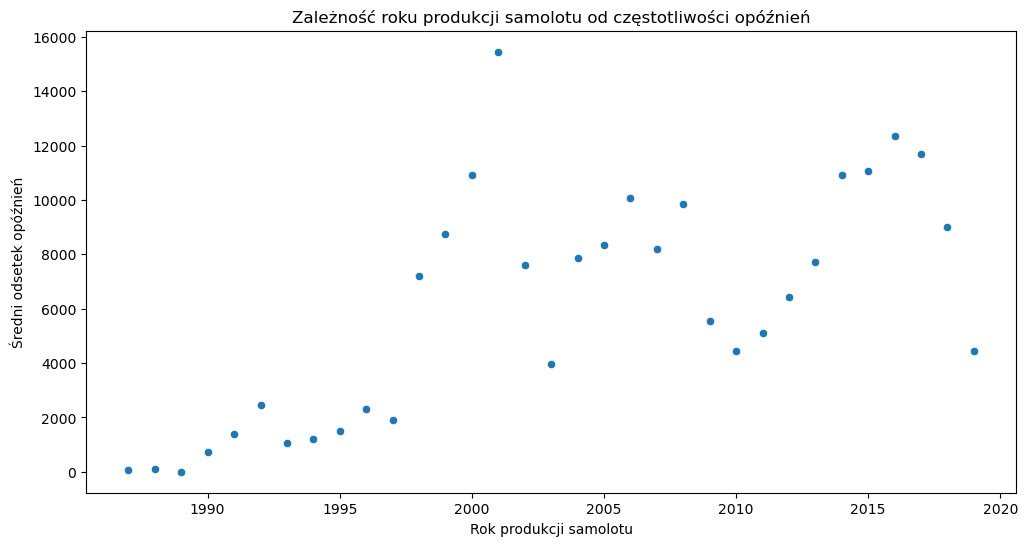

In [225]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='manufacture_year', y='is_delayed', data=delays_by_manufacture_year_df)
plt.title('Zależność roku produkcji samolotu od częstotliwości opóźnień')
plt.xlabel('Rok produkcji samolotu')
plt.ylabel('Średni odsetek opóźnień')
plt.show()

 Tutaj zmodyfikuj wykres tak, aby prezentował tylko te roczniki, które odbyły więcej niż 10000 lotów

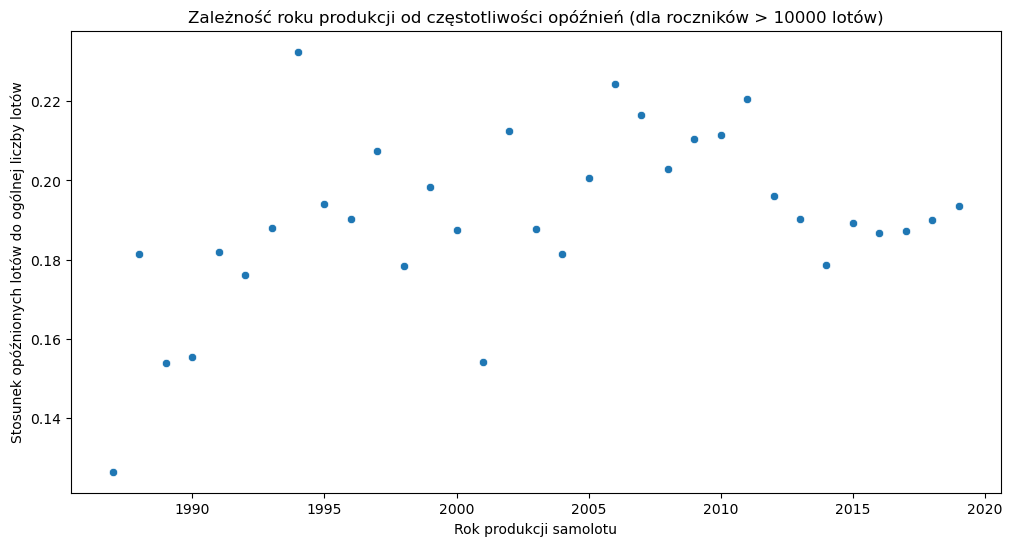

In [226]:

manufacture_year_stats = tmp_flight_df.groupby('manufacture_year')['is_delayed'].agg(['count', 'sum']).reset_index()


manufacture_year_stats['delay_ratio'] = manufacture_year_stats['sum'] / manufacture_year_stats['count']
manufacture_year_stats['delay_ratio'].round(2)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='manufacture_year', y='delay_ratio', data=manufacture_year_stats)
plt.title('Zależność roku produkcji od częstotliwości opóźnień (dla roczników > 10000 lotów)')
plt.xlabel('Rok produkcji samolotu')
plt.ylabel('Stosunek opóźnionych lotów do ogólnej liczby lotów')
plt.show()


In [227]:
manufacture_year_stats['delay_ratio'].round(2)

0     0.13
1     0.18
2     0.15
3     0.16
4     0.18
5     0.18
6     0.19
7     0.23
8     0.19
9     0.19
10    0.21
11    0.18
12    0.20
13    0.19
14    0.15
15    0.21
16    0.19
17    0.18
18    0.20
19    0.22
20    0.22
21    0.20
22    0.21
23    0.21
24    0.22
25    0.20
26    0.19
27    0.18
28    0.19
29    0.19
30    0.19
31    0.19
32    0.19
Name: delay_ratio, dtype: float64

 ## Opóźnienia vs. rok produkcji samolotu cz. 2
 Dokonaj agregacji kolumny `manufacture_year` do kolumny `manufacture_year_agg` zgodnie z poniższym:
 1. Grupując dane co 3 lata -> Czy po grupowaniu można zauważyć zależność? Wyniki zapisz do ramki `flight_delays_by_manufacture_year_agg_df`.
 1. Wyznacz top 5 roczników samolotu, które wykonały najwięcej lotów. Wyniki zapisz do ramki `top_manufactured_df`, do obliczeń wykorzystaj `delays_by_manufacture_year_df`.

 Tutaj dodaj kolumnę `manufacture_year_agg` do ramki `flight_df`

In [273]:
flight_df['manufacture_year_agg'] = (flight_df['manufacture_year'] // 3 * 3).round()

In [274]:
flight_df.columns

Index(['id', 'month', 'day_of_month', 'day_of_week', 'op_unique_carrier',
       'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'dep_time', 'dep_delay', 'dep_time_blk', 'crs_arr_time',
       'arr_time', 'arr_delay_new', 'arr_time_blk', 'cancelled',
       'crs_elapsed_time', 'actual_elapsed_time', 'distance', 'distance_group',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'year', 'is_delayed', 'is_weekend',
       'distance_agg', 'manufacture_year', 'manufacture_year_agg',
       'delay_ration', 'delay_ratio'],
      dtype='object')

In [275]:
flight_df['manufacture_year_agg'].head()

0   2004
1   2016
2   1998
3   1998
4   2001
Name: manufacture_year_agg, dtype: float64

 Tutaj stwórz zmienną `flight_delays_by_manufacture_year_agg_df`

In [280]:
flight_delays_by_manufacture_year_agg_df = flight_df.groupby('manufacture_year_agg').agg(
    total_flights=('id', 'sum'),
    total_delayed_flights=('is_delayed', 'sum'),
    delay_ratio=('delay_ratio', 'mean')
).reset_index()


In [282]:
flight_delays_by_manufacture_year_agg_df['manufacture_year_agg']

0    1986
1    1989
2    1992
3    1995
4    1998
5    2001
6    2004
7    2007
8    2010
9    2013
10   2016
11   2019
Name: manufacture_year_agg, dtype: float64

In [286]:
flight_delays_by_manufacture_year_agg_df.columns

Index(['manufacture_year_agg', 'total_flights', 'total_delayed_flights',
       'delay_ratio'],
      dtype='object')

 Tutaj stwórz wykres w oparciu o dane zawarte w `flight_delays_by_manufacture_year_agg_df`

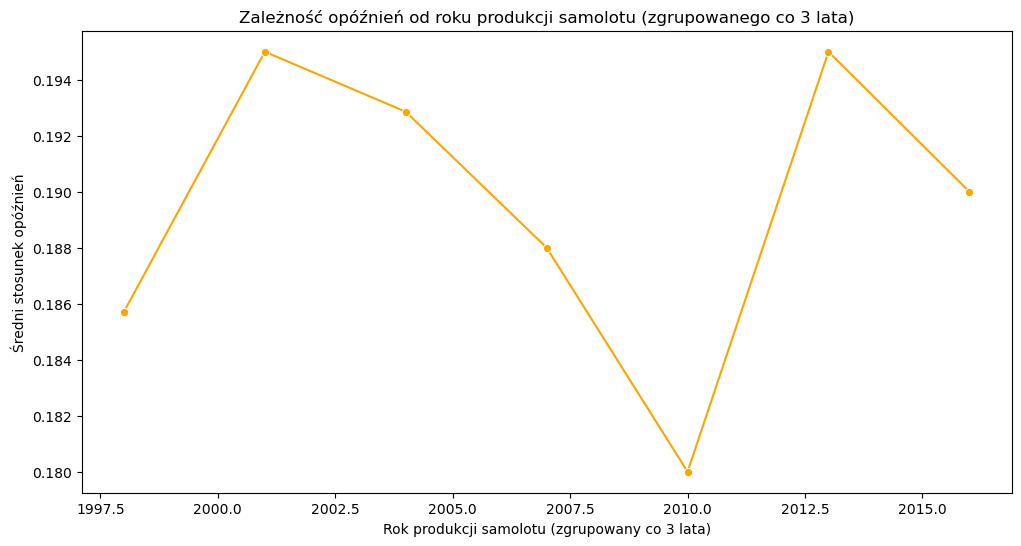

In [284]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='manufacture_year_agg', y='delay_ratio', data=flight_delays_by_manufacture_year_agg_df, marker='o', color = 'orange')
plt.title('Zależność opóźnień od roku produkcji samolotu (zgrupowanego co 3 lata)')
plt.xlabel('Rok produkcji samolotu (zgrupowany co 3 lata)')
plt.ylabel('Średni stosunek opóźnień')
plt.show()

Tutaj wyznacz TOP 5 roczników produkcji - czyli sortując według liczby wykonanych lotów, pamiętaj o wyświetleniu również wartości opóźnienia.

In [314]:
top_manufactured_df = flight_delays_by_manufacture_year_agg_df.nlargest(5, 'total_flights')

In [315]:
top_manufactured_df

,manufacture_year_agg,total_flights,total_delayed_flights,delay_ratio
5,2001,114782403482,27029,0
9,2013,113668548952,29685,0
10,2016,113667258205,33032,0
4,1998,95572979039,26843,0
6,2004,92109783182,26282,0


 # Podsumowanie
 W tym notatniku do naszej wyjściowej ramki danych `flight_df` dołączyliśmy tabelę `aircraft_df` i za jej pomocą dodaliśmy kolejny wymiar do naszej analizy. Zauważmy, ile dodatkowych wniosków mogliśmy wyciągnąć dzięki jej dodaniu.

 Zanim przejdziemy dalej, należy zapisać bieżącą postać ramki (najlepiej lokalnie), która zostanie użyta w kolejnym notatniku.

 > **Wskazówka:**  
 > Aby uniknąć potencjalnych problemów, najlepiej zapisać ramkę z nazwą nawiązującą do tego notatnika, np. `flight_df_01`.

 Tutaj zapisz ramkę w najdogodniejszy sposób

In [316]:
flight_df.to_csv('flight_df_02.csv', index=False)